In [2]:
#Authored by Kyle Larson and Kyle Savery for machine learning 3d print application
#Todo bring time stamp in
import csv
with open('hexcone51.csv', 'r') as fileI:
    my_reader = csv.reader(fileI, delimiter=',')
    f = open("hexconexl8d51.csv", "w")
    f.write("Index,Temperature,Distance1,Distance2,Distance3\n")
    splitFlag = 1
    splitFlop =0
    distCt =0
    towrite=""
    t=0
    for row in my_reader:
        #To do time stamp magic here
        
        #erase white space
        #check for split
        if ( len(row) != 0 and row[0] != ' '):
            lr = len(row[0])
            if(row[0][lr-3] =="." and splitFlag != 1):
                t = t+1
                #reset split flag
                splitFlag =2
                towrite = str(t)+","+row[0][0:lr]+","
                splitFlop = 1
                distCt = 0
        #else if quadruple 
        #no split run as usual
            if( row[0].isnumeric() ):
                if(distCt<2):
                    towrite = towrite+row[0][0:3]+","
                    distCt = distCt +1;
                elif(distCt==2):
                    towrite = towrite+row[0][0:3]+",\n"
                    distCt = 0
                    f.write(towrite)
                    towrite = ""
            if(row[0][lr-3] == "." and splitFlop!=1):
                t = t+1
                towrite = towrite+row[0][0:lr]+","
                distCt = 0 
            splitFlag=splitFlag+1
            splitFlop =0
            
f.close()

In [3]:
import pandas as pd
hc51_df =hc51_df = pd.read_csv("hexconexl8d51.csv")
#for some reason pandas doesnt like my choice of columns so some renaming is necessary
hc51_df =hc51_df.rename(columns={"Distance2":"Distance_3"})
hc51_df =hc51_df.rename(columns={"Distance1":"Distance_2"})
hc51_df =hc51_df.rename(columns={"Temperature":"Distance_1"})
hc51_df = hc51_df.rename(columns={"Index":"Temperature"})
cols =list(hc51_df.columns)
#some of the columns are treated as strings and should instead be integers
hc51_df['Temperature'] = pd.to_numeric(hc51_df['Temperature'])
i=0
for _ in cols:
    i=i+1
    if(i==2):
        hc51_df[_] = hc51_df[_].astype(int)
hc51_df = hc51_df.drop("Distance3", axis=1)
hc51_df.head()

,Temperature,Distance_1,Distance_2,Distance_3
1,86.45,132,132.0,133.0
2,87.35,129,127.0,131.0
3,86.90,134,134.0,134.0
4,88.25,135,134.0,132.0
5,86.90,132,134.0,134.0


In [4]:
#it is clear that the some of the temperature values were missing 
#and pandas just grabbed the distance measurement
hc51_df = hc51_df.dropna()
#361 is the max theoretical measurement because of where the sensor was located
hc51_df.drop(hc51_df[hc51_df['Distance_1'] >= 360].index, inplace = True)
hc51_df.drop(hc51_df[hc51_df['Distance_2'] >= 360].index, inplace = True)
hc51_df.drop(hc51_df[hc51_df['Distance_3'] >= 360].index, inplace = True)

In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

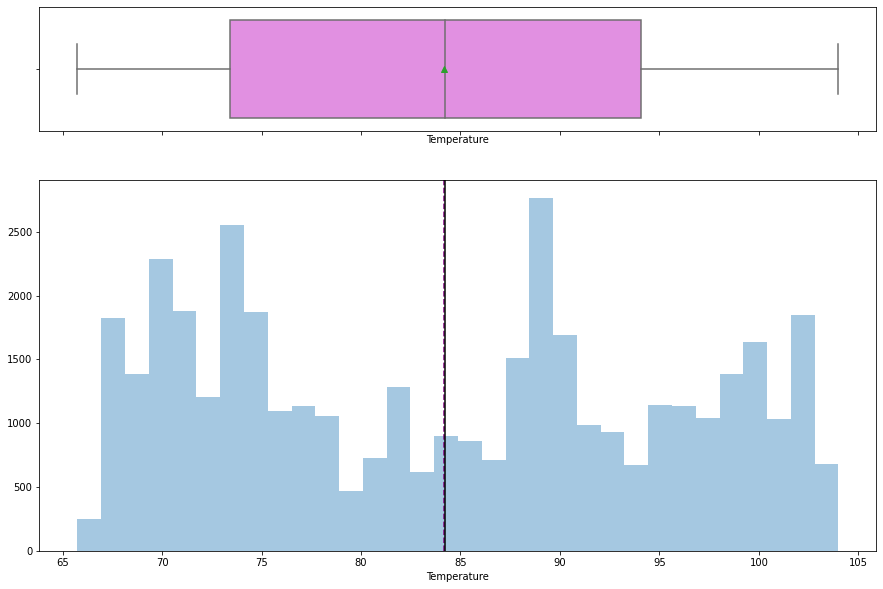

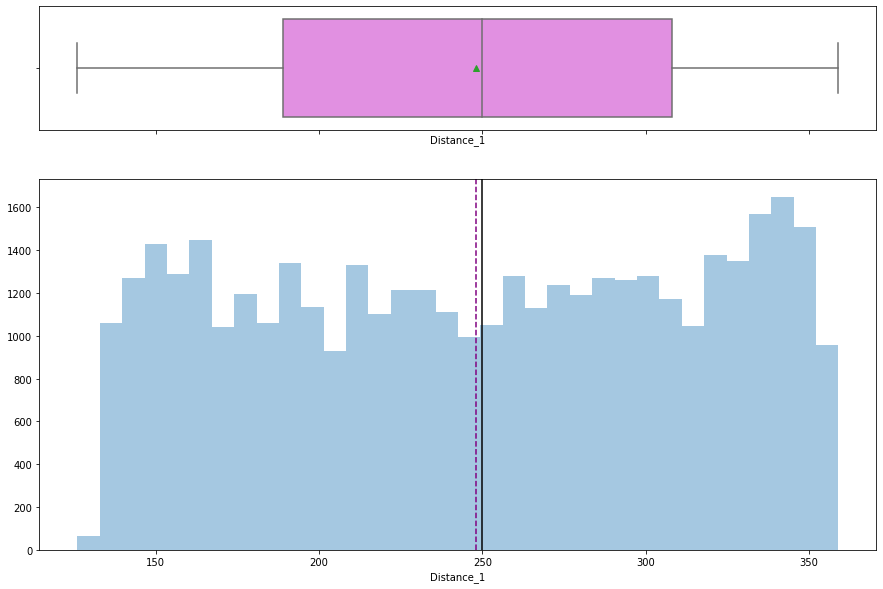

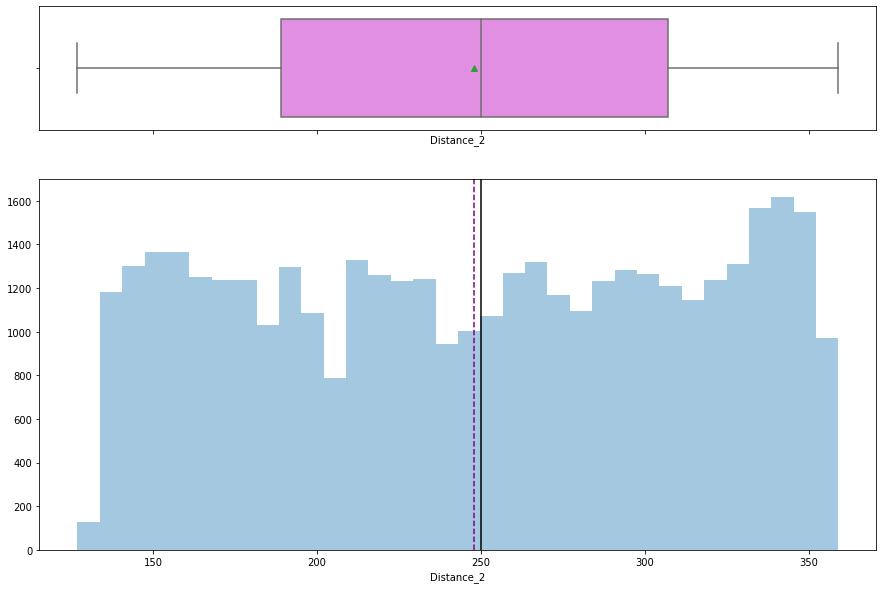

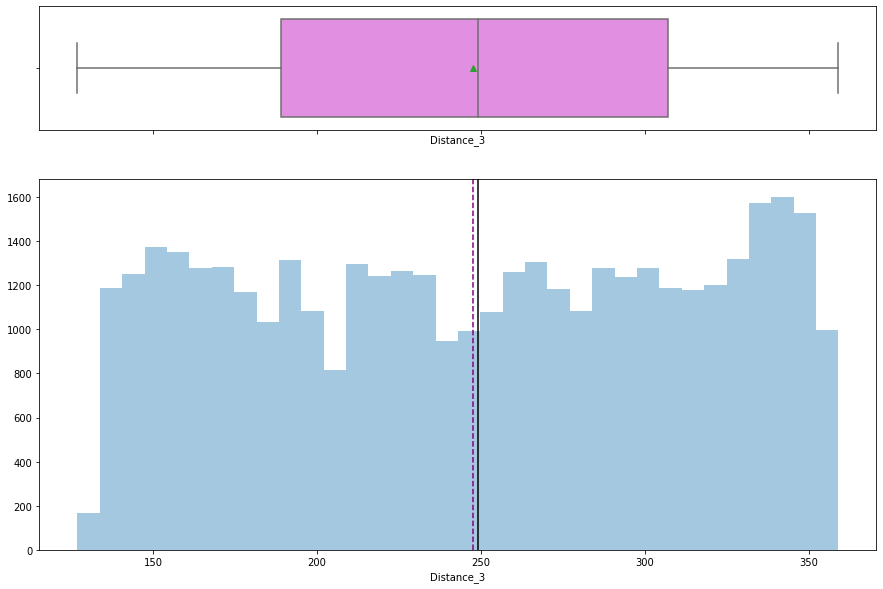

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, color="orange"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2, color="tab:blue"
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram



#hopefully dropna fixed it


cols =list(hc51_df.columns)
for _ in cols:
    histogram_boxplot(hc51_df[_])

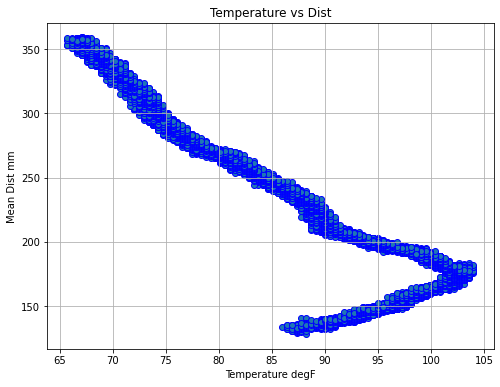

In [6]:
#Lets Now See About Relationships 
# its clear the distance data have roughly the same standard deviation however 
# we want residuals not pure st dev
hc51_df['Mean Dist'] = (hc51_df["Distance_1"]+hc51_df["Distance_2"]+hc51_df["Distance_3"])/3

fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(hc51_df["Temperature"], hc51_df["Mean Dist"], edgecolors=(0, 0, 1))
ax.set_xlabel('Temperature degF')
ax.set_ylabel('Mean Dist mm')
ax.set_title("Temperature vs Dist")
plt.grid()
plt.show()
#correlation doesnt imply causation however 
#and its really the variability in the Mean Dist that is the objective of this plot.

In [7]:

#square residual
def sr(Y, Y_bar):
    return (Y-Y_bar)**2

hc51_df['Var Dist'] =( sr(hc51_df['Distance_1'],hc51_df['Mean Dist']) + 
    sr(hc51_df['Distance_2'],hc51_df['Mean Dist']) + 
    sr(hc51_df['Distance_3'],hc51_df['Mean Dist']) )/3

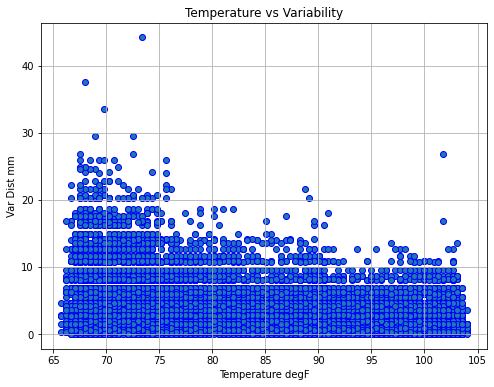

In [8]:
#how was temperature related to variance
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(hc51_df["Temperature"], hc51_df["Var Dist"], edgecolors=(0, 0, 1))

ax.set_xlabel('Temperature degF')
ax.set_ylabel('Var Dist mm')
ax.set_title("Temperature vs Variability")
plt.grid()
plt.show()

In [9]:
#Now the data were still collecting when the print had finished
hc51_df.describe()

,Temperature,Distance_1,Distance_2,Distance_3,Mean Dist,Var Dist
count,40574.000000,40574.000000,40574.000000,40574.000000,40574.000000,40574.000000
mean,84.162923,247.881377,247.782817,247.717602,247.793932,2.682090
std,11.328022,66.737325,66.779660,66.828695,66.761853,2.960401
min,65.750000,126.000000,127.000000,127.000000,128.333333,0.000000
25%,73.400000,189.000000,189.000000,189.000000,189.000000,0.666667
50%,84.200000,250.000000,250.000000,249.000000,249.666667,1.555556
75%,94.100000,308.000000,307.000000,307.000000,307.333333,3.555556
max,104.000000,359.000000,359.000000,359.000000,359.000000,44.222222
